In [ ]:
# Importing required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import DistilBertTokenizerFast
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import re

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# from google.colab import drive
# drive.mount('/content/drive')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Path to data file
file_path = 'HW4_Question2_dataset2.xlsx'

# Reading the xslv file along with the labels
df = pd.read_excel(file_path)

### Question no. 1
- Create dataset that contains 1000 words in total (5 points) and minimum two categories with at least 100 examples per category

In [ ]:
# Path to data file
file_path = 'HW4_Question2_dataset2.xlsx'

# Reading the Excel file along with the labels
df = pd.read_excel(file_path)

# Assuming your text data is in a column named 'Text', you can replace it with the actual column name
text_column_name = 'Data'

# Concatenate all text in the specified column into a single string
all_text = ' '.join(df[text_column_name].astype(str))

# Use regular expression to count words (assuming words are separated by whitespace)
word_count = len(re.findall(r'\b\w+\b', all_text))

print(f'Total number of words in the data column: {word_count}')

Total number of words in the data column: 6401


In [ ]:
# Displaying number of entries for each category in the dataset
df['label'].value_counts()

label
technology    300
sports        260
Name: count, dtype: int64

### Created a dataset that contains 6401 words in total and two categories and has more than 100 examples in each category.

In [ ]:
# Display the DataFrame
df.head()

,Data,label
0,The rapid advancement in technology has transf...,technology
1,"From smartphones to artificial intelligence, t...",technology
2,Machine learning and deep learning lead cuttin...,technology
3,These algorithms power applications like image...,technology
4,Autonomous vehicles rely on advanced machine l...,technology


In [ ]:
# Displaying shape of the total dataset
df.shape

(560, 2)

### Question no. 2
- Training set should. contain minimum 160 examples (2.5 points) and Test set should contain minimum 40 examples

In [ ]:
# Assuming your original DataFrame has a column "label" with string labels
label_mapping = {"technology": 0, "sports": 1}

# Use the map function to replace string labels with numerical values
df["label"] = df["label"].map(label_mapping)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# Training data shape
train_data.shape

(358, 2)

In [ ]:
# validation data shape
val_data.shape

(90, 2)

In [ ]:
# Testing data shape
test_data.shape

(112, 2)

- Training data has 358 entries.
- Testing data has 112 entries.
- Validation data has 90 entries.

In [ ]:
# Displaying first 5 rows of the training dataset
train_data.head()

,Data,label
497,Paddleboarding races involve paddlers standing...,1
268,Social robotics explores the interaction betwe...,0
36,"Voice-activated virtual assistants, like Siri ...",0
370,Edge AI in manufacturing enhances quality cont...,0
468,The World Surf League crowns the best professi...,1


In [ ]:
# Displaying first 5 rows of the testing dataset
test_data.head()

,Data,label
453,Weightlifting competitions test athletes' stre...,1
341,Quantum metrology achieves highly precise meas...,0
177,The Premier League is one of the most-watched ...,1
86,Neural interfaces enable communication between...,0
332,Edge AI in manufacturing improves production e...,0


In [ ]:
# Displaying first 5 rows of the training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 497 to 94
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    358 non-null    object
 1   label   358 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


### Question no. 3.1
- Fine tuning a pre-trained model with the dataset you created.

In [ ]:
# Importing necessary libraries
# early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Using the DistilBERT tokenizer to convert text data into tokens
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenizing the training data and converting it into a numpy array
tokenized_data = tokenizer(list(train_data["Data"]), return_tensors="np", padding=True)

# Tokenizing the validation data and converting it into a numpy array
tokenized_val_data = tokenizer(list(val_data["Data"]), return_tensors="np", padding=True)

# Converting the tokenized data into a dictionary for Keras
tokenized_data = dict(tokenized_data)
tokenized_val_data = dict(tokenized_val_data)

# Extracting numerical labels from the training and validation data
train_labels = np.array(train_data["label"])
val_labels = np.array(val_data["label"])

In [ ]:
# Importing necessary libraries
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
from tensorflow.keras.optimizers import Adam

# Load DistilBERT model with a specific configuration
config = DistilBertConfig(dropout=0.1)  # Adjust dropout rate as needed
model_1 = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)

# Compile the model with an optimizer and a loss function
# Using Adam optimizer with a learning rate of 3e-5
# Binary crossentropy loss is used for binary classification
model_1.compile(optimizer=Adam(learning_rate=3e-5), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model using the tokenized training data and labels
# Validation data and labels are provided for monitoring model performance on unseen data
# Training for 16 epochs
history_1 = model_1.fit(x=tokenized_data, y=train_labels, validation_data=(tokenized_val_data, val_labels), epochs=8)

2023-12-11 23:46:35.375790: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-11 23:46:35.375822: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-11 23:46:35.375830: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-11 23:46:35.375911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-11 23:46:35.375950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_no

Epoch 1/8


2023-12-11 23:46:42.281543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:46:42.630126: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


12/12 [==============================] - 19s 830ms/step - loss: 1.8669 - accuracy: 0.5698 - val_loss: 0.3730 - val_accuracy: 0.7778
Epoch 2/8
12/12 [==============================] - 4s 346ms/step - loss: 0.2287 - accuracy: 0.6145 - val_loss: 0.0572 - val_accuracy: 0.7333
Epoch 3/8
12/12 [==============================] - 4s 348ms/step - loss: 0.0209 - accuracy: 0.4804 - val_loss: 4.1686e-04 - val_accuracy: 0.5444
Epoch 4/8
12/12 [==============================] - 4s 346ms/step - loss: 0.0038 - accuracy: 0.3883 - val_loss: 0.0000e+00 - val_accuracy: 0.4333
Epoch 5/8
12/12 [==============================] - 4s 356ms/step - loss: 4.1310e-04 - accuracy: 0.4078 - val_loss: 0.0000e+00 - val_accuracy: 0.4556
Epoch 6/8
12/12 [==============================] - 4s 331ms/step - loss: 0.0000e+00 - accuracy: 0.3520 - val_loss: 0.0000e+00 - val_accuracy: 0.4556
Epoch 7/8
12/12 [==============================] - 4s 295ms/step - loss: 3.0463e-04 - accuracy: 0.3911 - val_loss: 0.0000e+00 - val_accurac

In [ ]:
# Tokenize the test data using the same tokenizer used for training and validation
tokenized_test_data = tokenizer(list(test_data["Data"]), return_tensors="np", padding=True)

# Tokenizer returns a BatchEncoding, converting it to a dictionary for compatibility with Keras
tokenized_test_data = dict(tokenized_test_data)

# Extract numerical labels from the test data
test_labels = np.array(test_data["label"])

# Evaluate the trained model on the test data
evaluation = model_1.evaluate(tokenized_test_data, test_labels)

4/4 [==============================] - 4s 525ms/step - loss: 0.0000e+00 - accuracy: 0.3750


In [ ]:
# Make predictions on the test data using the trained model
output = model_1.predict(tokenized_test_data)

4/4 [==============================] - 4s 474ms/step


In [ ]:
# Importing necessary libraries
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
from tensorflow.keras.optimizers import Adam

# Load DistilBERT model with a specific configuration
config = DistilBertConfig(dropout=0.2)  # Adjust dropout rate as needed
model_2 = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)

# Compile the model with an optimizer and a loss function
# Using Adam optimizer with a learning rate of 3e-5
# Binary crossentropy loss is used for binary classification
model_2.compile(optimizer=Adam(learning_rate=3e-5), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model using the tokenized training data and labels
# Validation data and labels are provided for monitoring model performance on unseen data
# Training for 16 epochs
history_2 = model_2.fit(x=tokenized_data, y=train_labels, validation_data=(tokenized_val_data, val_labels), epochs=12)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/12
12/12 [==============================] - 24s 1s/step - loss: 1.1725 - accuracy: 0.4106 - val_loss: 0.5670 - val_accuracy: 0.4444
Epoch 2/12
12/12 [==============================] - 5s 428ms/step - loss: 0.4326 - accuracy: 0.3799 - val_loss: 0.1825 - val_accuracy: 0.2667
Epoch 3/12
12/12 [==============================] - 5s 440ms/step - loss: 0.0753 - accuracy: 0.5223 - val_loss: 0.0037 - val_accuracy: 0.6778
Epoch 4/12
12/12 [==============================] - 5s 394ms/step - loss: 0.0040 - accuracy: 0.6397 - val_loss: 7.2271e-04 - val_accuracy: 0.8222
Epoch 5/12
12/12 [==============================] - 4s 354ms/step - loss: 3.2032e-04 - accuracy: 0.6704 - val_loss: 0.0000e+00 - val_accuracy: 0.8556
Epoch 6/12
12/12 [==============================] - 4s 361ms/step - loss: 0.0015 - accuracy: 0.6983 - val_loss: 0.0000e+00 - val_accuracy: 0.8667
Epoch 7/12
12/12 [==============================] - 5s 408ms/step - loss: 6.3851e-05 - accuracy: 0.7318 - val_loss: 0.0000e+00 - val_a

In [ ]:
# Tokenize the test data using the same tokenizer used for training and validation
tokenized_test_data = tokenizer(list(test_data["Data"]), return_tensors="np", padding=True)

# Tokenizer returns a BatchEncoding, converting it to a dictionary for compatibility with Keras
tokenized_test_data = dict(tokenized_test_data)

# Extract numerical labels from the test data
test_labels = np.array(test_data["label"])

# Evaluate the trained model on the test data
evaluation = model_2.evaluate(tokenized_test_data, test_labels)

4/4 [==============================] - 5s 781ms/step - loss: 0.0000e+00 - accuracy: 0.9286


In [ ]:
# Make predictions on the test data using the trained model
output = model_2.predict(tokenized_test_data)

4/4 [==============================] - 5s 774ms/step


In [ ]:
# Importing necessary libraries
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
from tensorflow.keras.optimizers import Adam

# Load DistilBERT model with a specific configuration
config = DistilBertConfig(dropout=0.5)  # Adjust dropout rate as needed
model_3 = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)

# Compile the model with an optimizer and a loss function
# Using Adam optimizer with a learning rate of 3e-5
# Binary crossentropy loss is used for binary classification
model_3.compile(optimizer=Adam(learning_rate=3e-5), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model using the tokenized training data and labels
# Validation data and labels are provided for monitoring model performance on unseen data
# Training for 16 epochs
history_3 = model_3.fit(x=tokenized_data, y=train_labels, validation_data=(tokenized_val_data, val_labels), epochs=5)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/5


2023-12-11 23:49:04.943376: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


12/12 [==============================] - 30s 2s/step - loss: 0.8651 - accuracy: 0.4385 - val_loss: 0.5942 - val_accuracy: 0.4222
Epoch 2/5
12/12 [==============================] - 7s 545ms/step - loss: 0.5613 - accuracy: 0.5056 - val_loss: 0.4070 - val_accuracy: 0.2667
Epoch 3/5
12/12 [==============================] - 7s 547ms/step - loss: 0.2501 - accuracy: 0.3184 - val_loss: 0.0924 - val_accuracy: 0.0556
Epoch 4/5
12/12 [==============================] - 5s 445ms/step - loss: 0.0260 - accuracy: 0.1173 - val_loss: 0.0085 - val_accuracy: 0.0778
Epoch 5/5
12/12 [==============================] - 5s 374ms/step - loss: 0.0491 - accuracy: 0.2151 - val_loss: 0.0012 - val_accuracy: 0.0667


In [ ]:
# Tokenize the test data using the same tokenizer used for training and validation
tokenized_test_data = tokenizer(list(test_data["Data"]), return_tensors="np", padding=True)

# Tokenizer returns a BatchEncoding, converting it to a dictionary for compatibility with Keras
tokenized_test_data = dict(tokenized_test_data)

# Extract numerical labels from the test data
test_labels = np.array(test_data["label"])

# Evaluate the trained model on the test data
evaluation = model_3.evaluate(tokenized_test_data, test_labels)

4/4 [==============================] - 7s 1s/step - loss: 0.0023 - accuracy: 0.0625


In [ ]:
# Make predictions on the test data using the trained model
output = model_3.predict(tokenized_test_data)

4/4 [==============================] - 8s 1s/step


### Going ahead with the model which gave the highest accuracy. It had Dropout value of 0.2 and epochs equal 12

In [ ]:
# Print the keys available in the history object, which contains training/validation metrics
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


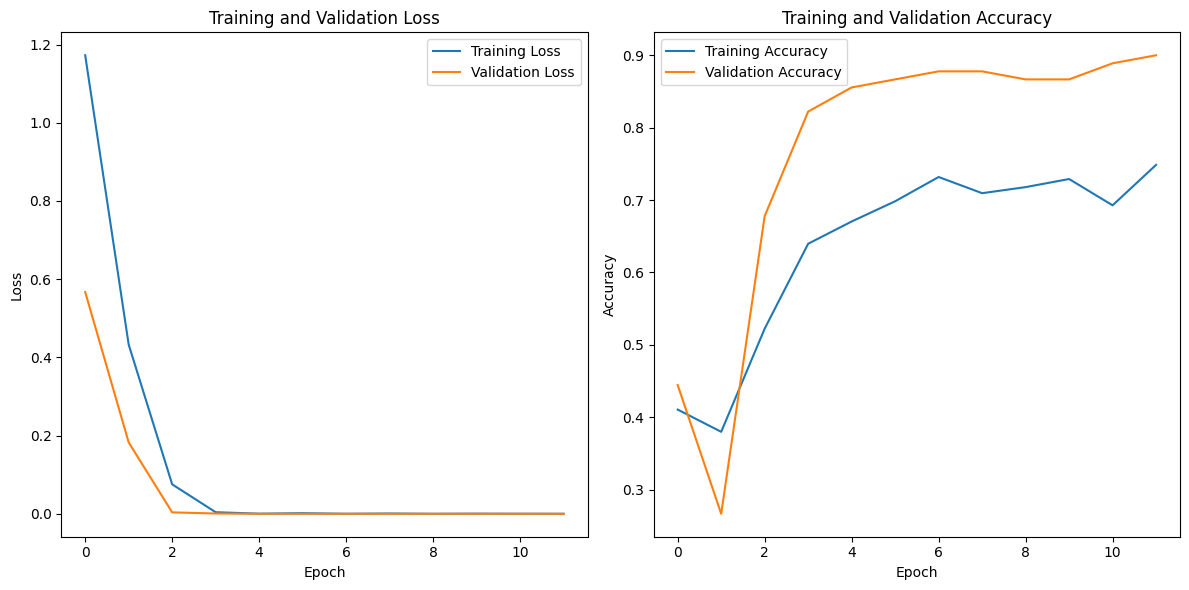

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Question no. 3.3
- Improvements
  1. Due to the limited size of our dataset, the pretrained model is exhibiting overfitting issues, hindering its ability to generalize effectively.
  2. Providing more diverse training data with multi-label data could enhance the accuracy of the model.